In [4]:
## 랜덤포레스트에 대해 배워보자 
## 이전 decisiontree_randomforest.pdf 참고(62강에 있다.)
'''
투표기반 분류(voting classifier)
여러 머신러닝 알고리즘 모델을 학습시킨 후에 생성된 모델을 이용하여 
새로운 데이터에 대한 모델별 예측값에 대해서 다수결 투표를 통해 최종 클래스를 예측하는 
방법 
'''
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons  # 반달모양의 패턴을 가지는 데이터셋 생성

X , y = make_moons (n_samples=500, noise=0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  VotingClassifier

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(estimators =[ ('lr', log_clf), 
                                            ('svc', svm_clf ), 
                                            ('rf', rnd_clf)], 
                                                 voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  dec...
                                                     criterion='gini',
    

In [6]:
#결과출력 
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [8]:
'''
간접 투표(soft voting) 분류기 : 각 머신러닝 분류 알고리즘의 예측값의 확률에 대해 평균을 계산 후 평균이 가장 높은 클래스로 최종 앙상블 예측을 수행
'''
#soft-voting=에서는 SVC probability = False시 값 출력 X(따로 빼냄)
svm_clf = SVC(probability=True, random_state=42)
voting_clf = VotingClassifier(estimators =[ ('lr', log_clf), ('svc', svm_clf ), 
                                            ('rf', rnd_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


In [16]:
'''bagging
하나의 알고리즘을 사용할 때 학습 데이터셋을 랜덤하게 추출(샘플링)하여 학습을 통해 모델을
생성할때 중복을 허용해서 학습 데이터 셋을 랜덤하게 추출하는 방식
'''
'''pasting
학습 데이터셋의 중복을 허용하지 않는 샘플링 
'''
## 샘플링한 학습 데이터셋으로 생성된 모델은 전체 학습 데이터셋으로 학습시킨 것 보다 
## 편향되어 있지만, 앙상블을 통해서 편향과 분산이 감소 

from sklearn.tree import DecisionTreeClassifier

tree_clf =   DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('Accuracy=', accuracy_score(y_test, y_pred_tree))


from sklearn.ensemble import BaggingClassifier
#샘플링 데이터셋(데이터 개수 100개)마다 DecisionTree모델 학습을 500번 수행
bag_clf =  BaggingClassifier ( DecisionTreeClassifier(random_state=42), 
                               n_estimators=500,  
                               max_samples=100, bootstrap=True,   
                               n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred =bag_clf.predict(X_test)
print('Accuracy=', accuracy_score(y_test, y_pred ))
#BaggingClassifier는 각 예측 클래스의 확률을 추정하여 soft voting방식을 사용합니다.


Accuracy= 0.856
Accuracy= 0.904


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-pac

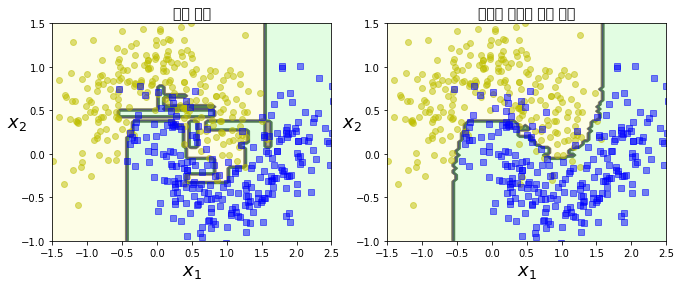

In [18]:
#BaggingClassifier은 과적합을 방지하여 정확도를 향상시킵니다.
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("결정 트리", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("배깅을 사용한 결정 트리", fontsize=14)
plt.show()


In [19]:
'''
 bagging = resampling : bootstrap 방식
예] 난수를 이용하여 학습 데이터 셋을 여러번 샘플링하면 어떤 데이터는 여러번 샘플링되어 
학습데이터셋으로 사용될 수 있고 어떤 데이터는 전혀 샘플링되지 않을 수 있습니다.
전혀 샘플링되지 않은 데이터를 oob(out-of-bag) 샘플
앙상블 bagging 학습 단계에서 oob 샘플은 사용되지 않기 때문에 검증 셋이나 교차 검증에 
사용할 수 있습니다. (oob_score=True)
'''
bag_clf =  BaggingClassifier ( DecisionTreeClassifier(random_state=42), 
                               n_estimators=500,  
                               max_samples=100, bootstrap=True,  
                               n_jobs=-1, random_state=42, oob_score=True)
bag_clf.fit(X_train, y_train)
print('oob score ', bag_clf.oob_score_) #예측스코어 향상 


oob score  0.9253333333333333


In [24]:
# RandomForestClassifier와  BaggingClassifier 성능 비교
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,  n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print('Accuracy=', accuracy_score(y_test, y_pred_rf ))



bag_clf =  BaggingClassifier ( DecisionTreeClassifier(splitter="random", 
                                                      max_leaf_nodes=16, 
                                                      random_state=42), 
                              n_estimators=500,  
                              max_samples=1.0, bootstrap=True,  
                              n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred  = bag_clf.predict(X_test)
print('Accuracy=', accuracy_score(y_test, y_pred ))

Accuracy= 0.912
Accuracy= 0.92


In [27]:
# 두 모델의 예측 비교
print(np.sum(y_pred==y_pred_rf) / len(y_pred))

0.976


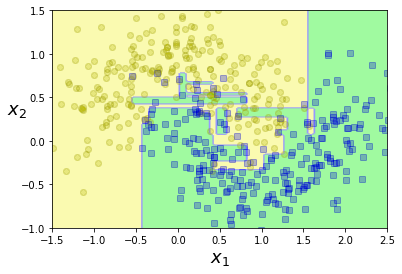

In [28]:
plt.figure(figsize=(6, 4))
for i in range(15):
    tree_cf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42+i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_cf .fit(X_train, y_train)
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5,2.5,-1,1.5], alpha=0.02, contour=False)

plt.show() #아직 과대적합의 형태가 나오고 있음 

In [32]:
# RandomForest는 특성의 상대적 중요도를 측정하기 쉽다. 
# scikit-learn에서는 어떤 특성을 사용하여 분류된 노드에서 불순도(impurity)
# 를 얼마나 감소시키는지를 계산하여 각 특성마다 상대적 중요도를 측정합니다. 
# (계산된 특성별 중요도는 feature_importances_ 속성으로 확인)

# iris데이터로 확인해보자.
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_ ) :
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


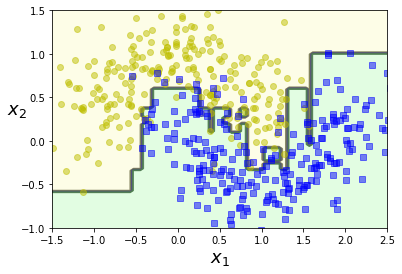

In [35]:
''' boosting
성능이 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 학습
(앞에서 학습된 모델을 보완해나가면서 더 나은 모델로 학습하는 것 )
'''
'''
AdaBoost와 Adaptive Boosting 
과소적합(underfitted)된 학습 데이터 샘플의 가중치를 높여서 새로 학습된 모델이 학습하기
어려운 데이터에 잘 적합되도록 하는 방식

1. 전체 학습 데이터셋을 이용하여 학습 후 모델 생성 
2. 잘못 예측된(분류된) 샘플의 가중치를 상대적으로 높여서 적용하여 
   두번 째 학습 후 모델을 생성 
'''

from sklearn.ensemble import AdaBoostClassifier 

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm = "SAMME.R", #약한학습기를 여러번 연결해서 하는 방식 
                             learning_rate=0.5,
                             random_state=42)
ada_clf.fit(X_train, y_train)
plot_decision_boundary(ada_clf, X, y)


In [38]:
'''그레디언트 boosting  
이전에 학습된 모델의 오차를 보완하는 방향으로 모델을 학습시키는 방법
학습 전단계에서 모델의 잔여 오차를 줄이는 새로운 학습 모델을 생성 
'''
np.random.seed(42)
X = np.random.rand(100, 1) -0.5
y = 3*X[:, 0]**2+0.05 *np.random.rand(100)

from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

#잔여 오차 다시 사용 
y2 = y-tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2-tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)


                                

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 랜덤 포레스트 분류기훈련 

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()  # 데이터 로드
features = iris.data
target = iris.target

# 랜덤 포레스트 분류기 객체를 만듭니다.
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
model = randomforest.fit(features, target)  # 모델 훈련

observation = [[ 5,  4,  3,  2]] # 새로운 샘플을 만듭니다.
print(model.predict(observation))  # 샘플 클래스를 예측합니다.

# 엔트로피를 사용하여 랜덤 포레스트 분류기 객체를 만듭니다.
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)
model_entropy = randomforest_entropy.fit(features, target)  # 모델 훈련

observation = [[ 5,  4,  3,  2]] # 새로운 샘플을 만듭니다.
print(model_entropy .predict(observation)) # 샘플 클래스를 예측합니다.

 

 

[1]
[1]


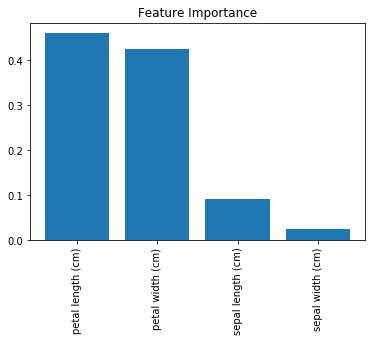

In [43]:
'''
랜덤 포레스트에서 중요한 특성 구분하기
 fearure_importances_ 속성에서 특성의 상대적 중요도를 제공합니다 
 (값이 클수록 더 중요한 특성이며 특성 중요도의 전체 합은 1입니다.)
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1) # 랜덤 포레스트 분류기 객체 생성
model = randomforest.fit(features, target) # 모델 훈련
importances = model.feature_importances_ # 특성 중요도 계산
indices = np.argsort(importances)[::-1] # 특성 중요도를 내림차순으로 정렬
names = [iris.feature_names[i] for i in indices] # 정렬된 특성 중요도에 따라 특성의 이름을 나열

plt.figure() # 그래프를 만듭니다.
plt.title("Feature Importance") # 그래프 제목 지정
plt.bar(range(features.shape[1]), importances[indices]) # 막대 그래프 추가
plt.xticks(range(features.shape[1]), names, rotation=90) # x 축 레이블로 특성 이름을 사용
plt.show() # 그래프 출력

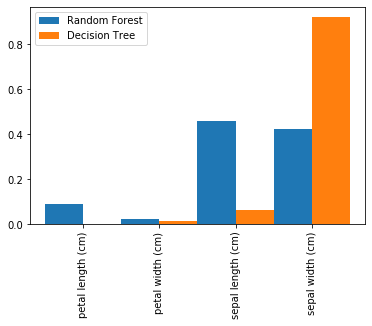

In [44]:
'''
랜덤 포레스트에서 중요한 특성 구분하기
 사이킷런에서는 순서가 없는 범주형 특성을 여러 개의 이진 특성으로 변환해야 합니다.
 특성의 중요도 또한 여러 개의 이진 특성으로 나뉘게 됩니다.
 원본 범주형 특성이 아주 중요하더라도 개별 이진 특성은 중요하지 않게 보일 수 있습니다.
 두 특성의 상관관계가 크다면 한 특성이 중요하게 나타났을 때 다른 특성은 훨씬 중요하지 않게 보일 것입니다
'''

decisiontree = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기 객체 생성
model = decisiontree.fit(features, target) # 모델 훈련

# 랜덤 포레스트와 결정 트리의 특성 중요도를 비교합니다.
# 과연 랜덤 포레스트가 결정 트리보다 중요도를 잘 찾을까?
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(features.shape[1])-0.25,
                randomforest.feature_importances_, 0.5,
                label='Random Forest')
rects2 = ax.bar(np.arange(features.shape[1])+0.25, 
                model.feature_importances_, 0.5,
                label='Decision Tree')
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.legend()
plt.show()

In [52]:
'''랜덤 포레스트에서 중요한 특성 선택하기(이어서)
 모델의 분산을 감소시키거나 가장 중요한 특서안 사용하여 모델을 이해하기 쉽게 만들어야 하는 경우 모델의 특성
개수를 감소시켜야 합니다
 사이킷런에서는 두 단계의 워크플로를 사용하여 줄어든 특성으로 모델을 만들 수 있습니다.
 1. 모든 특성을 사용해 랜덤 포레스트 모델을 훈련합니다.
 2. 중요한 특성만 포함된 새로운 특성 행렬을 만듭니다. (SelectFromModel 클래스를 사용해 threshold 값보다 중요
도가 크거나 같은 특성만 포함된 특성 행렬을 만듭니다.)
 3. 중요한 특성만을 사용한 새로운 모델을 훈련합니다.
 원-핫 인코딩된 순서가 없는 범주형 특성의 중요도는 여러 개의 이진 특성으로 희석됩니다.
 상관관계가 높은 특성의 중요도는 양쪽 특성에 고루 분산되는 것이 아니라 한 특성에 집중됩니다.
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1) # 랜덤 포레스트 분류기 객체 생성
# 특성 중요도가 임계값보다 크거나 같은 특성으로 객체를 만듭니다.
selector = SelectFromModel(randomforest, threshold=0.3)
# selector를 사용하여 새로운 특성 행렬을 만듭니다.
features_important = selector.fit_transform(features, target)
# 가장 중요한 특성을 사용하여 랜덤 포레스트 모델을 훈련합니다.
model = randomforest.fit(features_important, target)



In [ ]:
'''
불균형한 클래스 다루기
 불균형한 클래스를 적절히 처리하지 않으면 모델의 성능을 감소시킬 수 있습니다
 사이킷런의 많은 머신러닝 알고리즘은 불균형한 클래스를 바로 잡을 수 있는 방법을 내장하고 있습니다.
 RandomForestClassifier 클래스의 class_weight 매개변수를 사용하여 불균형한 클래스를 교정할 수 있습니다.
 클래스 이름과 원하는 상대적 가중치를 딕셔너리로 만들어 주입하면 그에 따라 RandomForestClassifier가 클래스
에 가중치를 부여합니다.
 매개변수값 balanced옵션은 데이터에 등장한 비율의 역수로 클래스 가중치를 자동으로 부여합니다.
'''
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target
features = features[40:,:] # 처음 40개의 샘플을 제거, 불균형한 데이터 생성
target = target[40:] #

# 0인 클래스 이외에는 모두 1인 타깃 벡터를 만듭니다.
target = np.where((target == 0), 0, 1)
randomforest = RandomForestClassifier( random_state=0, n_jobs=-1, class_weight="balanced")
model = randomforest.fit(features, target) # 모델 훈련
110/(2*10) # 작은 클래스의 가중치를 계산
110/(2*100) # 큰 클래스의 가중치를 계산

In [64]:
'''연습문제'''
##다음 의사결정 분류 분석 코드의 결과를 앙상블 학습인 RandomForest 
##분류 분석으로 수행하여 결과를 비교해보세요



import pandas as pd

uci_path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(uci_path, header=None)

df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhension', 
              'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 
              'matoses', 'class']
# chromatin : 염색체의 단백질 종류 중 하나 
# adhension : 부착, clump:덩어리, epithlial 상피

print(df.head())
print(df.info())
print(df.describe())

#bare_nuclei 문자열 숫자타입(int), 고유값 확인, 누락값 처리(행 삭제)
print(df['bare_nuclei'].unique())
df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')
print(df.describe())

X = df[['id', 'clump', 'cell_size', 'cell_shape', 'adhension', 'epithlial',
        'bare_nuclei', 'chromatin', 'normal_nucleoli', 'matoses']]

y = df['class']

# 정규화 
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

#train, test dataset 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)
print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)


# decision tree부터 해보자 
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)
print(y_hat[0:10])
print(y_test.values[0:10])

#모델 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tree_matrix = confusion_matrix(y_test, y_hat)
print(tree_matrix)

tree_report = classification_report(y_test, y_hat)
print(tree_report)



        id  clump  cell_size  cell_shape  adhension  epithlial bare_nuclei  \
0  1000025      5          1           1          1          2           1   
1  1002945      5          4           4          5          7          10   
2  1015425      3          1           1          1          2           2   
3  1016277      6          8           8          1          3           4   
4  1017023      4          1           1          3          2           1   

   chromatin  normal_nucleoli  matoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump              699 non-null int64
cell_size          699 non-null int64
cell_shape         699 n

In [75]:
'''
rf_model_= RandomForestClassifier(criterion="entropy",
                                  random_state=0, 
                                  n_jobs=-1, 
                                  class_weight="balanced")
                                  '''
rf_model_= RandomForestClassifier(criterion="entropy",
                                  n_estimators=20, 
                                  max_depth=5, 
                                  class_weight="balanced")
rf_model_.fit(X_train, y_train)

y_hat_rf = rf_model_.predict(X_test)
print(y_hat_rf[0:10])
print(y_test.values[0:10])

#모델 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf_matrix = confusion_matrix(y_test, y_hat_rf)
print(rf_matrix)

rf_report = classification_report(y_test, y_hat_rf)
print(rf_report)


[4 4 2 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]
[[129   2]
 [  2  72]]
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.97      0.97      0.97        74

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

